## Step 1. Importing Libraries

In [367]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

## Step 2 : Reading and Understanding dataset

In [368]:
# importing day dataset 
bike_df = pd.read_csv('day.csv')

In [369]:
# Looking at the first five rows
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [370]:
# checking rows and columns
bike_df.shape

(730, 16)

In [371]:
# checking  info of datframe
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [372]:
# describing dataFrame
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [373]:
#  checking dimenssion 
bike_df.ndim

2

#### Note : There are total 730 rows and 16 columns where no rows has null values and every column is contineous column except dteday column

## Step 3 : Cleaning data 

In [374]:
# creating a column day_old to check the business is how much old in number of days
bike_df['dteday'] =  pd.to_datetime(bike_df['dteday'] , format ='%d-%m-%Y')
# bike_df.dteday.dtypes
bike_df['day_old'] = bike_df.dteday - pd.to_datetime('01-01-2018')
bike_df['day_old'] = bike_df['day_old'].astype(str).map(lambda x :x[0:2]).astype(int)
# bike_df['days_old'] = (pd.to_datetime(bike_df['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days

In [375]:
# droping column dteday as we have already yr, mnth , weekday, workingday columns
bike_df.drop('dteday' , axis=1 , inplace=True)

# droping instant column as it is just a showing row number
bike_df.drop('instant' , axis=1 , inplace=True)

# droping causal and registered columns as both columns are sum of cnt column 
bike_df.drop(['casual' , 'registered'] , axis=1, inplace=True)

In [376]:
# checking new data frame 
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day_old
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


In [377]:
# checking infor of new data frame 
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  day_old     730 non-null    int32  
dtypes: float64(4), int32(1), int64(8)
memory usage: 71.4 KB


In [378]:
# cross checking is there is null values in data frame 
bike_df.isna().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
day_old       0
dtype: int64

Note : there is no null value present in dataframe so no need to handle missing data 

## Step 4 : EDA

#### As below column looks like a categorical so we will first change the values for it 
#### season , mnth , weathersit , weekday

In [379]:
# bike_df['weekday'].value_counts()
bike_df['weekday'] = bike_df['weekday'].replace({0 :'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [380]:
# bike_df.weathersit.value_counts()
bike_df['weathersit'] = bike_df['weathersit'].replace({1:'good' ,2:'average' ,3:'bad'})

In [381]:
# bike_df.mnth.value_counts()
bike_df['mnth'] = bike_df['mnth'].replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

In [382]:
# bike_df.season.value_counts()
bike_df['season'] = bike_df['season'].replace({1:'spring' , 2:'summer',3:'fall',4:'winter'})

In [383]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day_old
0,spring,0,jan,0,mon,1,average,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,jan,0,tue,1,average,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,jan,0,thu,1,good,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,1600,4


In [384]:
##### creating list of continueous and categorical coulmn 
# bike_df.info()
cat_col = ['season' ,'mnth','weekday' ,'weathersit','yr','holiday','workingday']
num_col =['temp','atemp','hum','windspeed','day_old','cnt']

### Univariate Analysis

#### Analysis for num_col

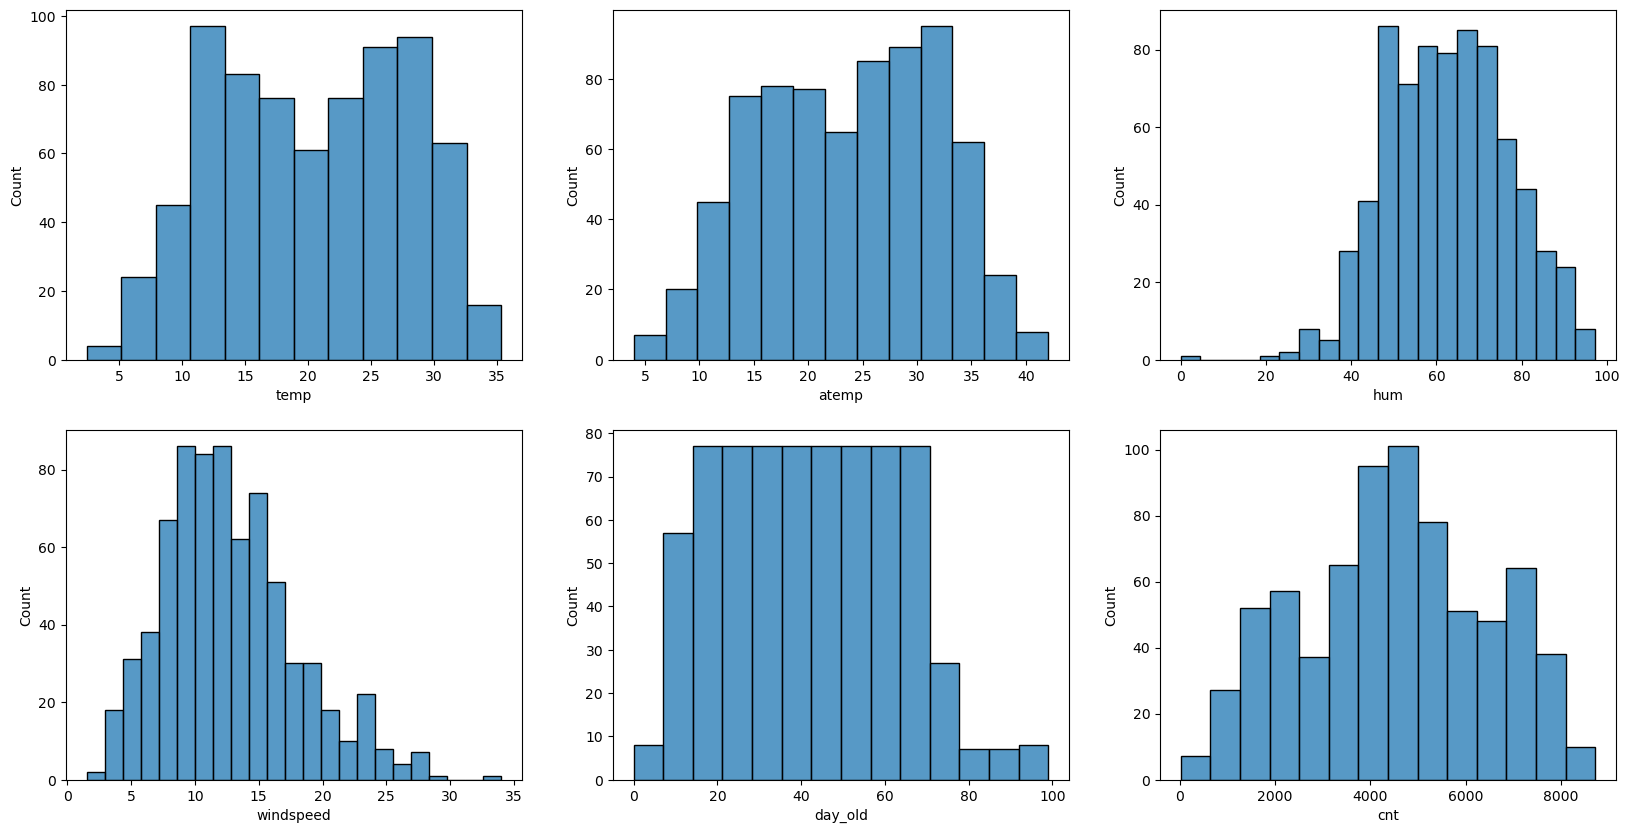

In [385]:
plt.figure(figsize=(20,10))
a=1
for i in num_col:
    plt.subplot(2,3,a)
    sns.histplot(bike_df[i])
    a+=1
plt.show()

#### Analysis for cat_col

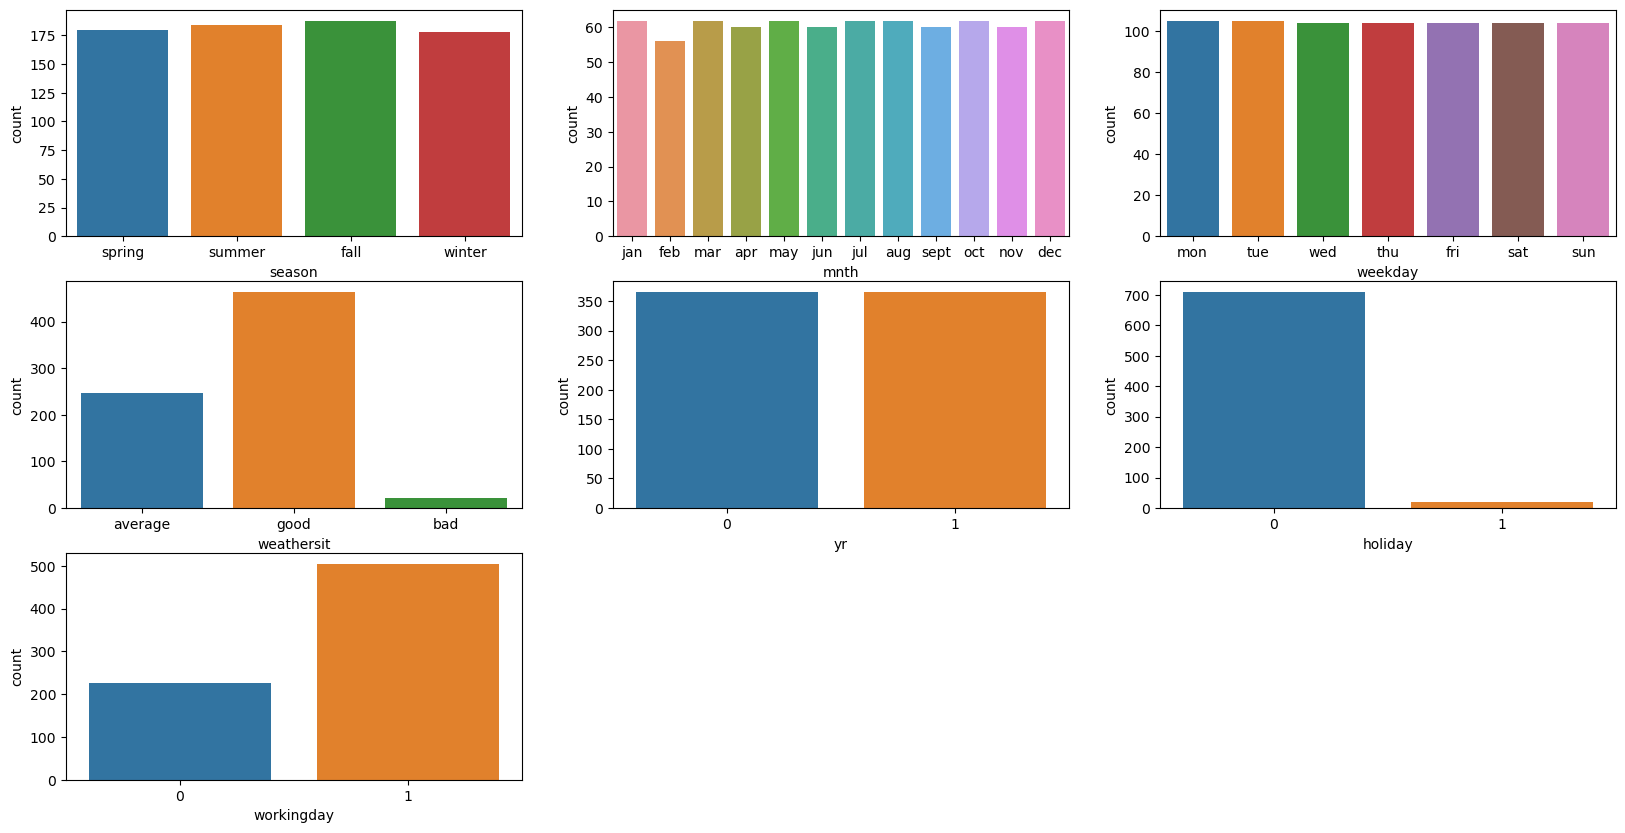

In [386]:
plt.figure(figsize=(20,10))
a=1
for i in cat_col:
    plt.subplot(3,3,a)
    sns.countplot(x=bike_df[i] )
    a+=1
plt.show()

### Bivariate Analysis

#### Analysis for num_col

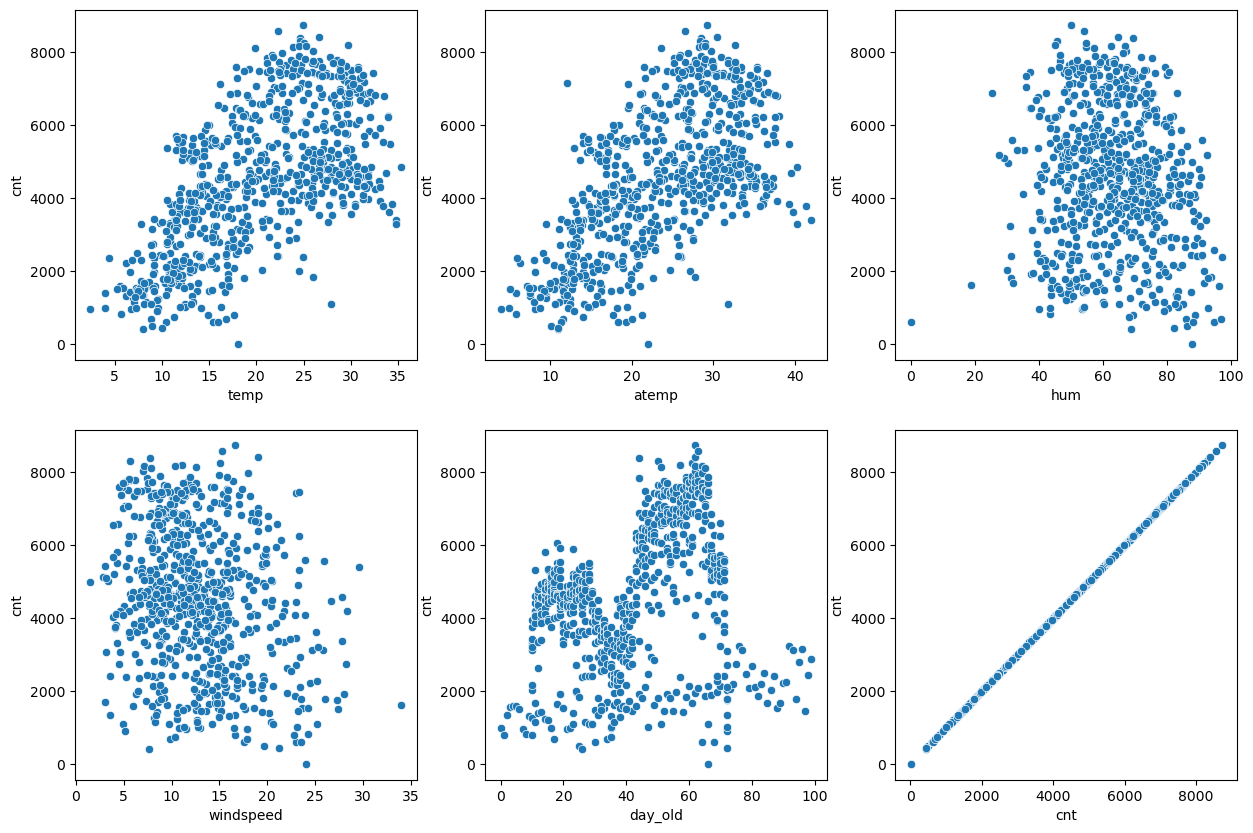

In [387]:
plt.figure(figsize=(15,10))
a=1
for i in num_col:
    plt.subplot(2,3,a)
    sns.scatterplot(x=bike_df[i] , y='cnt' , data=bike_df)
    a+=1
plt.ylabel('cnt')
plt.show()

#### Analysis for cat_col

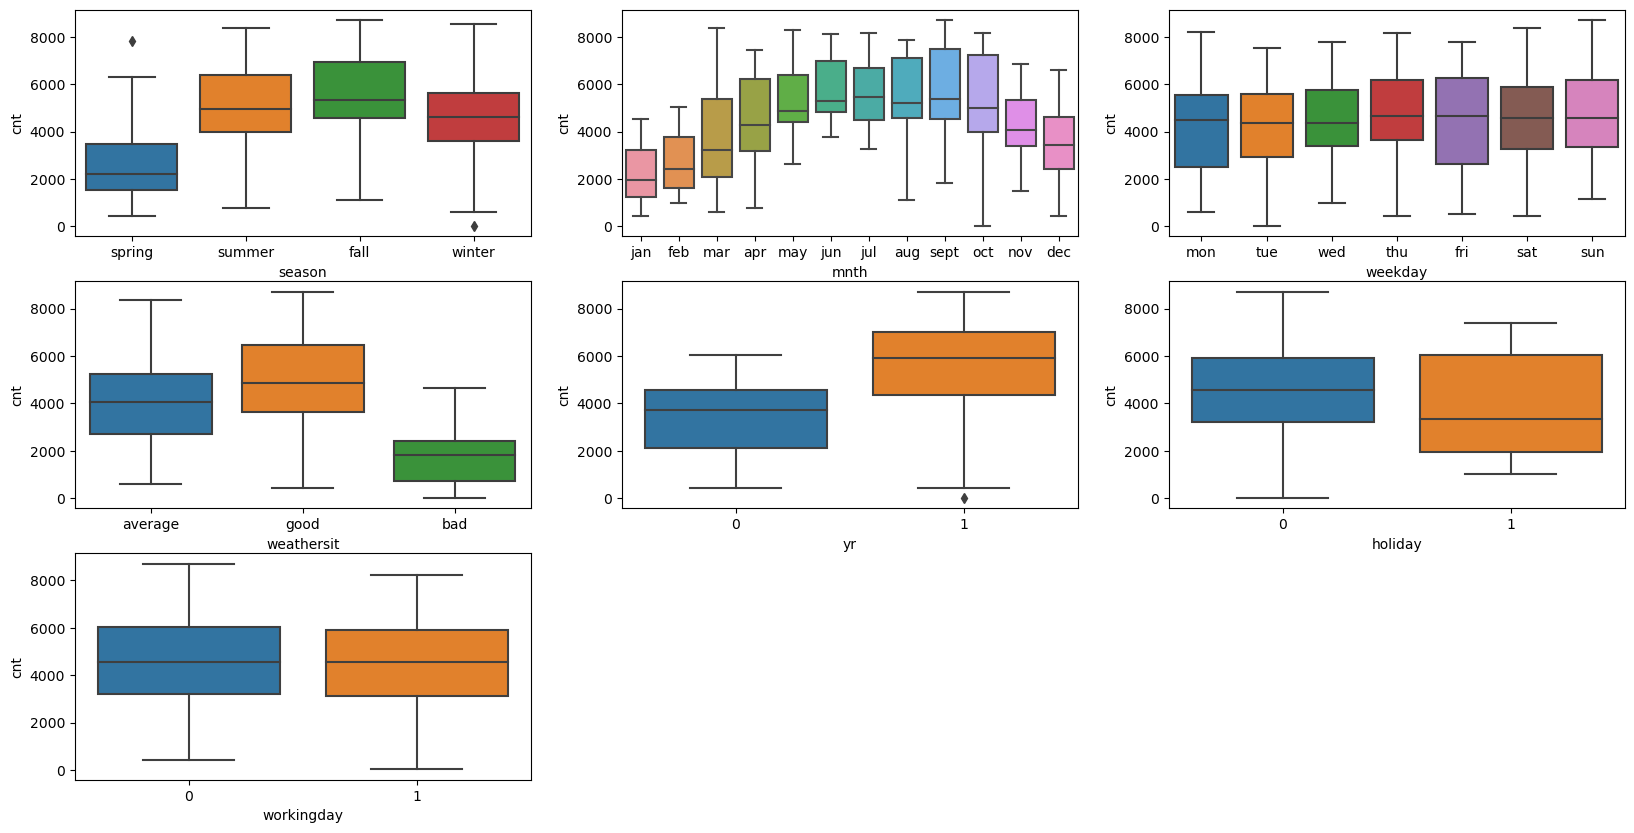

In [388]:
plt.figure(figsize=(20,10))
a=1
for i in cat_col:
    plt.subplot(3,3,a)
    sns.boxplot(x=bike_df[i] , y='cnt' , data=bike_df)
    a+=1
plt.show()

### MultiVariate Analysis

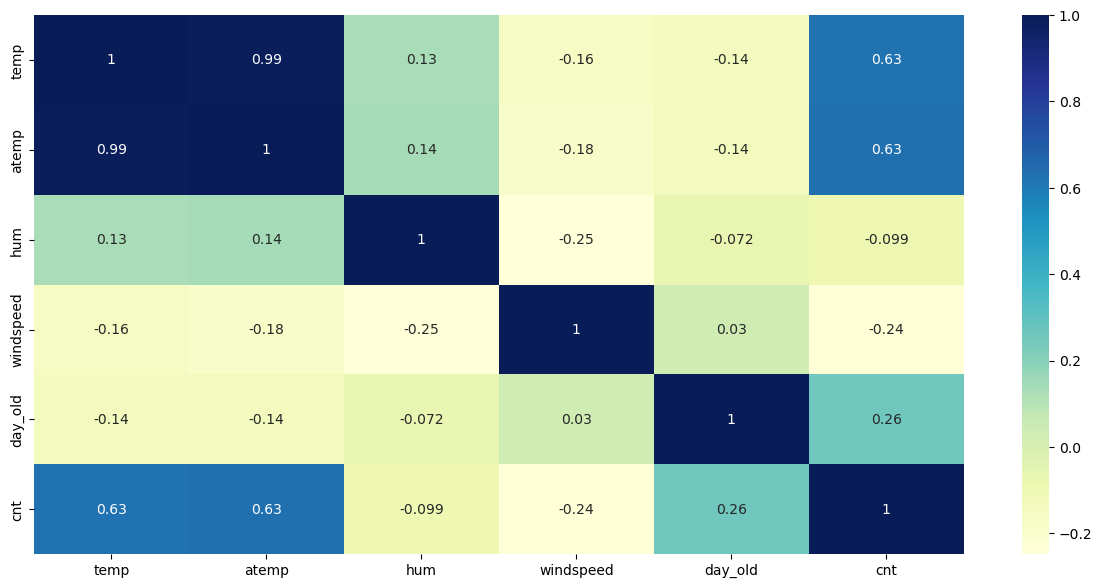

In [389]:
plt.figure(figsize=(15,7))
collls = ['temp','atemp','hum','windspeed','day_old','cnt']
sns.heatmap(bike_df[collls].corr(),  annot=True , cmap='YlGnBu' )
plt.show()

### Points to be Noted from above analysis
    1. there is high correlation between temp, atemp wth respect to dependent variable cnt
    2. both temp and atemp are highly co-related with each other.
    3. when the weather is good demand is more. 
    4. fall season has highest for demand.
    5. Whenever there is holiday demand is decreasing.
    6. from November to Februvary the demand is less.
    

## Step:5 - Data Preparation for LR

In [390]:
# bike_df[["season","mnth","weekday" , "weathersit"]]

### Create dummy variables for all categorical variables

In [391]:
bike_df = pd.get_dummies(data = bike_df , columns=["season","mnth","weekday"] , drop_first=True , dtype=int)
bike_df = pd.get_dummies(data = bike_df , columns=['weathersit'] , dtype=int)

In [392]:
# checking datbase
bike_df.head(10)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,day_old,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_average,weathersit_bad,weathersit_good
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,1,0,0,0,0,0,1,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,1,...,0,0,0,0,0,1,0,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,1,...,0,0,0,0,0,0,1,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,1,...,0,0,0,0,1,0,0,0,0,1
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,1,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,8.378268,11.66045,51.8261,6.000868,1606,5,1,...,0,0,1,0,0,0,0,0,0,1
6,0,0,0,8.057402,10.44195,49.8696,11.304642,1510,6,1,...,0,0,0,1,0,0,0,1,0,0
7,0,0,1,6.765000,8.11270,53.5833,17.875868,959,7,1,...,0,1,0,0,0,0,0,1,0,0
8,0,0,1,5.671653,5.80875,43.4167,24.250650,822,8,1,...,0,0,0,0,0,1,0,0,0,1
9,0,0,1,6.184153,7.54440,48.2917,14.958889,1321,9,1,...,0,0,0,0,0,0,1,0,0,1


In [393]:
#  checking new columns
bike_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'day_old', 'season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_average', 'weathersit_bad',
       'weathersit_good'],
      dtype='object')

## Step 6: Model Building

### spliting data into dataset 

In [394]:
# checking shape before spliting
bike_df.shape

(730, 32)

In [395]:
# train , test data with 70:30 ratio
np.random.seed(0)
df_train ,df_test = train_test_split(bike_df, test_size=0.3 , random_state=100)

In [396]:
print(df_train.shape)
print(df_test.shape)

(511, 32)
(219, 32)


### Feature Scaling continuous variables

In [397]:
scaler = MinMaxScaler()

num_var = ['temp','atemp','hum','windspeed','day_old','cnt']
# Fit and transform training set only
df_train[num_var] =scaler.fit_transform(df_train[num_var])

In [398]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,day_old,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_average,weathersit_bad,weathersit_good
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.508806,0.025440,0.712329,0.537386,0.513133,0.650333,0.320844,0.514186,0.445674,0.242661,...,0.080235,0.154599,0.129159,0.136986,0.142857,0.152642,0.136986,0.344423,0.029354,0.626223
std,0.500412,0.157613,0.453121,0.225640,0.212202,0.145741,0.169639,0.224737,0.208231,0.429112,...,0.271923,0.361876,0.335704,0.344170,0.350270,0.359994,0.344170,0.475645,0.168963,0.484280
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.341151,0.332910,0.538858,0.199179,0.356765,0.281250,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542077,0.529300,0.653499,0.298098,0.519673,0.447917,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754401,0.414438,0.688737,0.614583,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y sets for the model building

In [399]:
y_train = df_train.pop('cnt')
X_train = df_train
print(y_train.shape)
print(X_train.shape)

(511,)
(511, 31)


### Building a Model using RFE and Automated approach

In [400]:
# Build a Lienar Regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train , y_train)

LinearRegression()

In [401]:
# Cut down number of features to 15 using automated approach
rfe = RFE(estimator = lr, n_features_to_select=  15)
rfe.fit(X_train , y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [402]:
# Columns selected by RFE and their weights
list(zip(X_train.columns, rfe.support_, rfe.ranking_))


[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('day_old', False, 2),
 ('season_spring', True, 1),
 ('season_summer', False, 16),
 ('season_winter', True, 1),
 ('mnth_aug', False, 13),
 ('mnth_dec', False, 11),
 ('mnth_feb', False, 7),
 ('mnth_jan', False, 17),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 12),
 ('mnth_mar', False, 3),
 ('mnth_may', False, 6),
 ('mnth_nov', False, 10),
 ('mnth_oct', False, 5),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 9),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 14),
 ('weekday_tue', False, 8),
 ('weekday_wed', False, 15),
 ('weathersit_average', False, 4),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1)]

### Manual elimination

In [403]:
### Creating Functions to build a model using statsmodel api

def model_build(columns):
    X_train_sm = sm.add_constant(X_train[columns])
    lm_model = sm.OLS(y_train , X_train_sm).fit()
    print(lm_model.summary())
    return lm_model

In [404]:
### Creating Function to calculate VIFs and print them
def vif_Cal(columns):
    df1 = X_train[columns]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [405]:
# Columns selected by RFE
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_jul', 'mnth_sept',
       'weekday_sat', 'weekday_sun', 'weathersit_bad', 'weathersit_good'],
      dtype='object')

In [406]:
# Columns not selected by RFE
X_train.columns[~rfe.support_]

Index(['day_old', 'season_summer', 'mnth_aug', 'mnth_dec', 'mnth_feb',
       'mnth_jan', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct',
       'weekday_mon', 'weekday_thu', 'weekday_tue', 'weekday_wed',
       'weathersit_average'],
      dtype='object')

## Step 6: Build Model

### Model 1 - Start with all variables selected by RFE

In [407]:
columns  =['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_jul', 'mnth_sept',
       'weekday_sat', 'weekday_sun', 'weathersit_bad', 'weathersit_good']
model_build(columns)
print()
vif_Cal(columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     172.9
Date:                Tue, 30 Jan 2024   Prob (F-statistic):          1.04e-185
Time:                        22:11:49   Log-Likelihood:                 506.10
No. Observations:                 511   AIC:                            -980.2
Df Residuals:                     495   BIC:                            -912.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3410      0.081     

### Model 2: Dropping varaible weekday_sun as it has p-value more than 0.05

In [408]:
columns_2 = ['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_jul', 'mnth_sept',
       'weekday_sat', 'weathersit_bad', 'weathersit_good']
model_build(columns_2)
print()
vif_Cal(columns_2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.5
Date:                Tue, 30 Jan 2024   Prob (F-statistic):          9.13e-187
Time:                        22:11:49   Log-Likelihood:                 505.90
No. Observations:                 511   AIC:                            -981.8
Df Residuals:                     496   BIC:                            -918.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2958      0.036     

### Model 3 : Dropping column weekday_sat  as it has p-value more than 0.05

In [409]:
column_3 = ['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_jul', 'mnth_sept',
        'weathersit_bad', 'weathersit_good']

model_build(column_3)
print()
vif_Cal(column_3)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     200.1
Date:                Tue, 30 Jan 2024   Prob (F-statistic):          6.81e-188
Time:                        22:11:49   Log-Likelihood:                 505.82
No. Observations:                 511   AIC:                            -983.6
Df Residuals:                     497   BIC:                            -924.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2929      0.036     

### Model 4 : Dropping column atemp as it has p-value more than 0.05 

In [410]:
column_4 = ['yr', 'holiday', 'workingday', 'temp',  'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_jul', 'mnth_sept',
        'weathersit_bad', 'weathersit_good']

model_build(column_4)
print()
vif_Cal(column_4)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     216.6
Date:                Tue, 30 Jan 2024   Prob (F-statistic):          7.74e-189
Time:                        22:11:50   Log-Likelihood:                 505.27
No. Observations:                 511   AIC:                            -984.5
Df Residuals:                     498   BIC:                            -929.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2943      0.036     

### Model 5 : Dropping column workingday as it has p-value more than 0.05


In [411]:
column_5 = ['yr', 'holiday', 'temp',  'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_jul', 'mnth_sept',
        'weathersit_bad', 'weathersit_good']
model_build(column_5)
print()
vif_Cal(column_5)    

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     234.6
Date:                Tue, 30 Jan 2024   Prob (F-statistic):          3.37e-189
Time:                        22:11:51   Log-Likelihood:                 503.29
No. Observations:                 511   AIC:                            -982.6
Df Residuals:                     499   BIC:                            -931.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2847      0.035     

### Model 6 : Dropping column temp as it has VIF more than 5

In [412]:

column_6 = ['yr', 'holiday',  'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_jul', 'mnth_sept',
        'weathersit_bad', 'weathersit_good']

model_build(column_6)
print()
vif_Cal(column_6)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     158.2
Date:                Tue, 30 Jan 2024   Prob (F-statistic):          7.11e-148
Time:                        22:11:51   Log-Likelihood:                 402.78
No. Observations:                 511   AIC:                            -783.6
Df Residuals:                     500   BIC:                            -737.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4856      0.040     

### Model 7 : Dropping column hum as it has p-value more than 0.05 and VIF more than 5

In [413]:

column_7 = ['yr', 'holiday', 'windspeed',
       'season_spring', 'season_winter', 'mnth_jul', 'mnth_sept',
        'weathersit_bad', 'weathersit_good']

model_build(column_7)
print()
vif_Cal(column_7)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     176.1
Date:                Tue, 30 Jan 2024   Prob (F-statistic):          5.88e-149
Time:                        22:11:51   Log-Likelihood:                 402.65
No. Observations:                 511   AIC:                            -785.3
Df Residuals:                     501   BIC:                            -742.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4673      0.015     

### Model 8 : checking p-value and VIF of  temp column after droping hum is it working or not 

In [414]:

column_8 = ['yr', 'holiday', 'windspeed', 'temp',
       'season_spring', 'season_winter', 'mnth_jul', 'mnth_sept',
        'weathersit_bad', 'weathersit_good']

model_build(column_8)
print()
vif_Cal(column_8)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.0
Date:                Tue, 30 Jan 2024   Prob (F-statistic):          1.28e-186
Time:                        22:11:52   Log-Likelihood:                 494.32
No. Observations:                 511   AIC:                            -966.6
Df Residuals:                     500   BIC:                            -920.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1724      0.024     

#### temp column looks good to me for further predection as its p-value<0.05 and vif is near 5

### Model 9 : Dropping holiday column as it is not required for further predection 

In [415]:

column_9 = ['yr', 'windspeed', 'temp',
       'season_spring', 'season_winter', 'mnth_jul', 'mnth_sept',
        'weathersit_bad', 'weathersit_good']

model_build(column_9)
print()
vif_Cal(column_9)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     267.0
Date:                Tue, 30 Jan 2024   Prob (F-statistic):          7.42e-185
Time:                        22:11:54   Log-Likelihood:                 487.27
No. Observations:                 511   AIC:                            -954.5
Df Residuals:                     501   BIC:                            -912.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1725      0.024     

#### Note : so we can see above the model looks fine to me and the temp has VIF slightly above 5 so we can keep it as temp variable important for further predections

### final_model : 

In [416]:
final_columns = ['yr', 'windspeed', 'temp',
       'season_spring', 'season_winter', 'mnth_jul', 'mnth_sept',
        'weathersit_bad', 'weathersit_good']

X_train_sm_final = sm.add_constant(X_train[final_columns])
lm_final = sm.OLS(y_train , X_train_sm_final).fit()
print(lm_final.summary())


df1 = X_train[final_columns]
vif = pd.DataFrame()
vif['Features'] = df1.columns
vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     267.0
Date:                Tue, 30 Jan 2024   Prob (F-statistic):          7.42e-185
Time:                        22:11:56   Log-Likelihood:                 487.27
No. Observations:                 511   AIC:                            -954.5
Df Residuals:                     501   BIC:                            -912.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1725      0.024     

### Inference_
Here VIF seems to be almost accepted. p-value for all the features is almost 0.0 and R2 is 0.828
Let us select final model as our final as it has all important statistics high (R-square, Adjusted R-squared and F-statistic), along with no insignificant variables and no multi coliinear (high VIF) variables.
Difference between R-squared and Adjusted R-squared values for this model is veryless, which also means that there are no additional parameters that can be removed from this model.

## Step 7. Model Evaluation

### Residucal Analysis

In [417]:

y_train_pred = lm_final.predict(X_train_sm_final)

In [418]:
res = y_train - y_train_pred

Text(0.5, 1.0, 'Error Terms')

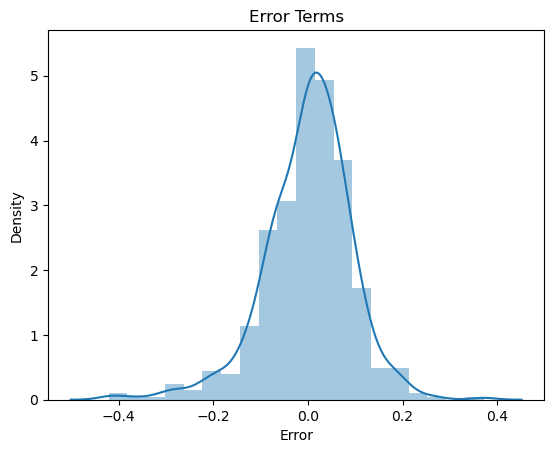

In [419]:
#Plotting a histogram of the error terms
sns.distplot(res , bins=20 )
plt.xlabel('Error')
plt.title('Error Terms')

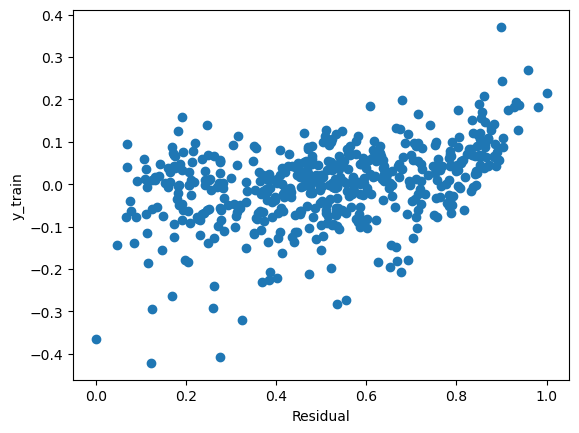

In [421]:
plt.scatter(y_train , res)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

#### Note : Error normally distributed in mean 0

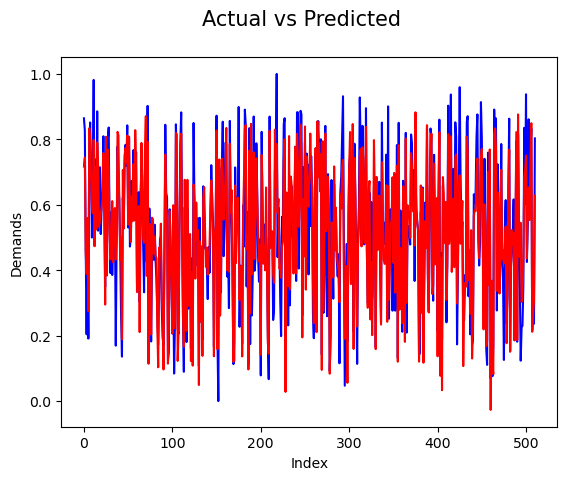

In [422]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c, y_train,      color="blue")
plt.plot(c, y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()


#### Actual and Predicted result following almost the same pattern so this model seems ok

In [423]:
#Print R-squared Value for training data
r2_score(y_train,y_train_pred)

0.8275042673617589

### Feature Scaling continuous variables for test data 

In [424]:
#Scale variables in df_test

num_vars = ['temp','atemp','hum','windspeed','day_old' ,'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test[num_vars]


,temp,atemp,hum,windspeed,day_old,cnt
184,0.831783,0.769660,0.657364,0.084219,0.187500,0.692706
535,0.901354,0.842587,0.610133,0.153728,0.552083,0.712034
299,0.511964,0.496145,0.837699,0.334206,0.302083,0.303382
221,0.881625,0.795343,0.437098,0.339570,0.229167,0.547400
152,0.817246,0.741471,0.314298,0.537414,0.156250,0.569029
...,...,...,...,...,...,...
400,0.257562,0.243430,0.708888,0.287411,0.416667,0.336516
702,0.519232,0.511907,0.756118,0.283397,0.729167,0.757478
127,0.584649,0.577380,0.650923,0.069510,0.125000,0.495973
640,0.745598,0.682653,0.817947,0.052115,0.666667,0.868615


In [425]:
y_test = df_test.pop('cnt')
X_test = df_test

In [426]:
print(y_test.shape)
print(X_test.shape)

(219,)
(219, 31)


### Predection for test data

In [427]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_final = X_test[final_columns]

# Adding a constant variable 
X_test_final_sm = sm.add_constant(X_test_final)


In [428]:
y_test_pred = lm_final.predict(X_test_final_sm)

Text(0, 0.5, 'y_pred')

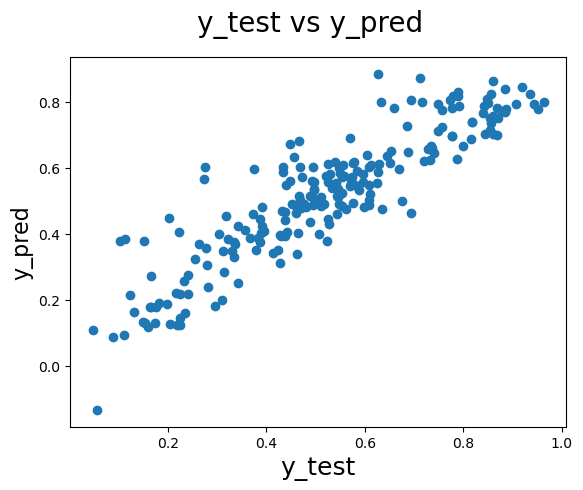

In [429]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Text(0, 0.5, 'Counts')

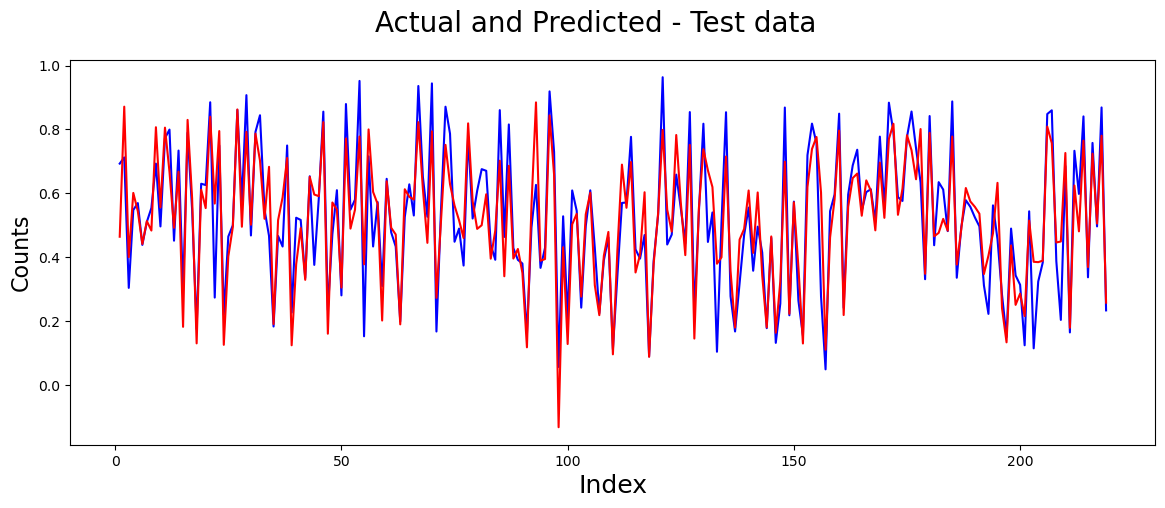

In [432]:
c = [i for i in range(1,len(y_test)+1,1)]
fig = plt.figure(figsize=(14,5))
plt.plot(c,y_test, color="blue",)
plt.plot(c,y_test_pred, color="red", )
fig.suptitle('Actual and Predicted - '+'Test data', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Counts', fontsize=16) 

### R-Squared value for test predictions

In [433]:
r2_score(y_test , y_test_pred)

0.8067139585390106

### Inference
R2 value for predictions on test data (0.807) is almost same as R2 value of train data(0.828). This is a good R-squared value, hence we can see our model is performing good even on unseen data (test data) 

## Step:8 Making Predictions

In [434]:
bike_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,day_old,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_average,weathersit_bad,weathersit_good
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,1,0,0,0,0,0,1,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,1,...,0,0,0,0,0,1,0,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,1,...,0,0,0,0,0,0,1,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,1,...,0,0,0,0,1,0,0,0,0,1
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,1,...,0,0,0,0,0,0,0,0,0,1


In [435]:
#### let's build a final model once again 
model_build(final_columns)
vif_Cal(final_columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     267.0
Date:                Tue, 30 Jan 2024   Prob (F-statistic):          7.42e-185
Time:                        22:16:53   Log-Likelihood:                 487.27
No. Observations:                 511   AIC:                            -954.5
Df Residuals:                     501   BIC:                            -912.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1725      0.024     

### Interpretation of the Results

#### Based on the above analysis, company needs to focus on following things :
    - Company should focus on expand bussiness in spring 
    - Company should focus on expand bussiness in july and spet
    - Based on previous data we are expecting to have a boom in number of userd once situation is comes back to normal.
    - There is less bookings during Rain and light snow , so we can utilize this time to service the bikes so the bussiness 
      will not impact.
      
####  Therefore when covid situation came back to normal, the company should come up with new offers during Spring and increase adverstisement in month of July n September.

### Conclusion
Significant variables to predict the demand for shared bikes

     - temp
     - windspeed
     - Year (2019)
     - Season (winter , Spring)
     - Month (July , Spetember)
     - weathersit(ligth Snow, Mist+Cloudy)
     - hum